In [1]:
from keras.datasets import cifar100
(train_X, train_Y), (test_X, test_Y ) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [3]:
test_X.shape

(10000, 32, 32, 3)

In [4]:
train_X.shape

(50000, 32, 32, 3)

In [5]:
train_X = train_X.reshape((50000, 32, 32, 3))
test_X = test_X.reshape((10000, 32, 32, 3))
train_X.shape, test_X.shape
train_X = train_X.astype('float32')
train_X = train_X/250
test_X = test_X.astype('float32')
test_X = test_X/250
     

In [6]:
from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [7]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 20
classes = 100

In [8]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape=(32,32,3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [9]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))

#Compile:
model.compile( loss =loss.categorical_crossentropy ,optimizer= "adam", metrics= ['accuracy'])
model.summary()
train = model.fit(train_X, train_Y, batch_size= batch_size, epochs= epochs, verbose= 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

Test loss: 6.274453639984131
Test accunacy 0.3970000147819519


Text(0.5, 1.0, 'Training & Testing Accuracy')

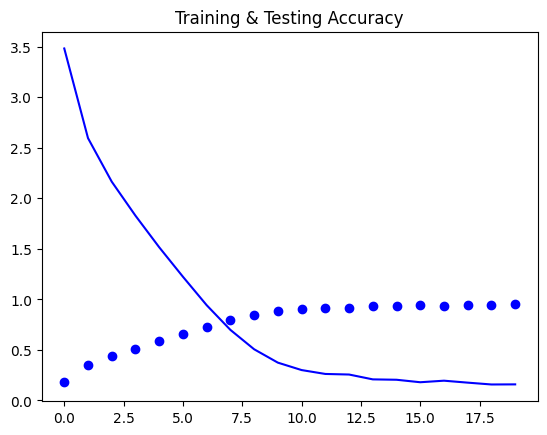

In [10]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [19]:
model.save('/content/drive/MyDrive/AI/AI_Backup/Cifar100CNN.h5')


1/1 [==============================] - 0s 121ms/step


array([10])

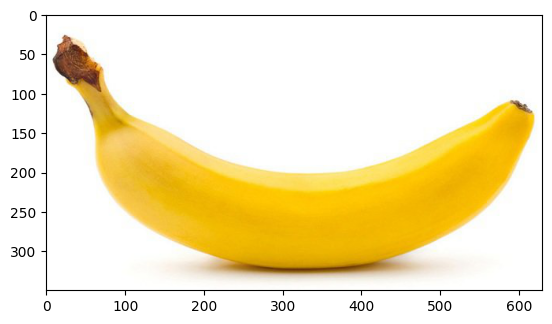

In [23]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

img1 = load_img('/content/drive/MyDrive/AI/AI_Backup/banana.jpg')
plt.imshow(img1)

img = load_img('/content/drive/MyDrive/AI/AI_Backup/banana.jpg', target_size = (32,32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 250
np.argmax(model.predict(img),axis = -1)

/bin/bash: is: command not found
